# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

●	The main objective of this project is to verify whether there is a typical profile of women who are independent and make or participate in decisions. 

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

. Looking closely at this emancipation, we want to see if  women's ability to work, make decisions, and own bank accounts depends on a specific demographic profile or level of education?

# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?


●	The data comes from a survey that was done in 2015 by several international agencies including the UN,USAID, MSPP, on morbidity, mortality and service utilization. These data were given to fred by one of his professors at the Technical Center of Planning and Applied Economics.

# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

In [890]:
import pandas as pd
# data processing librairies
import pandas as pd
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# data modeling
import statsmodels.api as sm
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [891]:
df=pd.read_csv("finalg_data.csv")

In [892]:
df.shape

(15513, 30)

In [893]:
df.drop(["Literacy","Educational attainment","Owns a house alone or jointly","Owns land alone or jointly","Husband/partner_age","Respondent worked in last 12 months","Husband/partner occupation"],axis=1,inplace=True)

In [894]:
df.drop(["Person who usually decides on respondent health care","Person who usually decides on large household purchases","Person who usually decides on visits to family or relatives"],axis=1,inplace=True)

In [895]:
df.drop(["Husband/partner education level","Husband/partner highest year of education","Highest year of education","Use mobile telephone for financial transactions"],axis=1,inplace=True)

In [896]:
df.dtypes

Case Identification                                             object
Respondent year of birth                                         int64
Respondent current age                                           int64
Age_group                                                       object
Region                                                          object
Type of place of residence                                      object
Highest educational level                                       object
Religion                                                        object
Education in single years                                        int64
Has an account in a bank or other financial institution         object
Wealth index combined                                           object
Total children ever born                                       float64
Current marital status                                          object
Respondent currently working                                    object
Respon

In [897]:
# df["yes_no"] = df.Age_group.apply(lambda x: "no" if x=="15-19" else "yes")
# df = df[df["yes_no"]=="yes"]
# df.columns

In [898]:
df["Total children ever born"]=df["Total children ever born"].fillna(0)

In [899]:
df['Total children ever born'] = df['Total children ever born'].astype(np.int64)

In [900]:
df.drop_duplicates(inplace=True)

In [901]:
df.shape


(15513, 16)

In [902]:
df.rename(columns={"Has an account in a bank or other financial institution":"Bank_Account","Region":"Departement","Respondent currently working":"currently_working","Current marital status":"marital status","Person who usually decides how to spend respondent earnings":"Spend earnings","Person who usually decides on respondent health care":"Health_care","Person who usually decides on large household purchases":"household purchases","Person who usually decides on visits to family or relatives":"visit family","Person who usually decides what to do with money husband earns":"dispose_money_partner","Type of place of residence":"Residence_place","Total children ever born":"children_number","Respondent current age":"Age"},inplace=True)
df.columns

Index(['Case Identification', 'Respondent year of birth', 'Age', 'Age_group',
       'Departement', 'Residence_place', 'Highest educational level',
       'Religion', 'Education in single years', 'Bank_Account',
       'Wealth index combined', 'children_number', 'marital status',
       'currently_working', 'Respondent_occupation', 'Spend earnings'],
      dtype='object')

## Here is my dataset which contains 15513 observations and 16 variables.
### Case Identification: a unique code assigned to each women of the questionnaire to identify them
### Respondent year of birth: date of birth of each women
### Age : Age of the women
### Age_group : Grouped age of women
### Departement: one of territoSubdivision of Haiti
### One of the territorial subdivisions of Haiti
### Residence_place : Region rural or urban
### Highest educational level : education level of the women
### Religion:Religious sect that the women frequent
### Bank_Account: If the women have an account in a bank or in other financial institution
### Children_number: the number of children that have each women
### Marital_status : explain the status of each women
### currently_working: If the women work at the time they answer the questionnaire
### Respondent_occupation: If the women work or not at the time they answer the questionnaire
### Spend_earnings: if the women decide how to spend they money without anyone's approval
### Wealth indice combined : Measure of the income of the women , their capacity to purchase  
     

## Why do i choose these variables
### I chose these variables because they will help me to carry out my project on women's financial independence. These variables are composed of demographic variables (age, department, residence, marital status) and characteristic variables that define whether a woman is independent or not (including: current work, occupation, bank account).

In [903]:

def missing_percent(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_table = pd.concat([mis_val, mis_percent], axis=1)
        
        # Rename the columns
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_columns

In [904]:
missing_percent(df)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,Percent of Total Values
Spend earnings,9941,64.08
marital status,1142,7.36
currently_working,1142,7.36
Respondent_occupation,1142,7.36


In [905]:
df["Departement"]= df["Departement"].apply(lambda x: str(x).replace('Rest-Ouest','Ouest'))

In [906]:
df["marital status"]= df["marital status"].apply(lambda x: str(x).replace('Living with partner','cohabitation'))

In [907]:
df["Departement"]= df["Departement"].apply(lambda x: "Ouest" if x=="Aire Metropolitaine" else x)

In [908]:
df["marital status"]= df["marital status"].apply(lambda x: str(x).replace('No longer living together/separated','separated'))
df["marital status"].value_counts()

Married           6328
Never in union    5760
cohabitation      1235
nan               1142
separated          797
Widowed            214
Divorced            37
Name: marital status, dtype: int64

In [909]:
def children_group(x):
    if x == 0 and x<6:
        return '0-5'
    else: 
        return '> 5'

In [910]:
df['children_group'] =  df.children_number.apply(children_group)

In [911]:
df.columns

Index(['Case Identification', 'Respondent year of birth', 'Age', 'Age_group',
       'Departement', 'Residence_place', 'Highest educational level',
       'Religion', 'Education in single years', 'Bank_Account',
       'Wealth index combined', 'children_number', 'marital status',
       'currently_working', 'Respondent_occupation', 'Spend earnings',
       'children_group'],
      dtype='object')

In [912]:
categorigals_variables=["Age_group","Departement","Residence_place","Highest educational level","Religion","Education in single years","Bank_Account","marital status","currently_working","Respondent_occupation","Spend earnings","Wealth index combined","children_group"]
df_categoricals=df[categorigals_variables]
df_categoricals

,Age_group,Departement,Residence_place,Highest educational level,Religion,Education in single years,Bank_Account,marital status,currently_working,Respondent_occupation,Spend earnings,Wealth index combined,children_group
0,15-19,Sud,Rural,Secondary,Protestant,10,No,Never in union,No,Not working and didnt work in last 12 months,NaN,Middle,0-5
1,25-29,Sud,Rural,Secondary,Catholic,11,No,Never in union,No,Commercant et assimilé,NaN,Poorest,0-5
2,15-19,Sud,Rural,Primary,Catholic,4,No,Never in union,No,Not working and didnt work in last 12 months,NaN,Poorest,0-5
3,30-34,Sud,Rural,Secondary,Protestant,12,Yes,Married,Yes,Insituteur et assimilés,Respondent and husband/partner,Richer,> 5
4,25-29,Sud,Rural,Secondary,Protestant,13,No,Married,No,Insituteur et assimilés,Respondent and husband/partner,Richer,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,50+,Ouest,Urban,Primary,Protestant,6,No,nan,NaN,NaN,NaN,Richest,0-5
15509,25-29,Ouest,Urban,Higher,Protestant,16,No,Never in union,No,Not working and didnt work in last 12 months,NaN,Richest,0-5
15510,30-34,Ouest,Urban,Higher,Protestant,15,Yes,Never in union,Yes,Employé administratif du secteur privé,NaN,Richest,0-5
15511,30-34,Ouest,Urban,Higher,Protestant,16,Yes,Never in union,No,Commercant et assimilé,NaN,Richest,0-5


In [913]:
import statistics
statistics.mode(df_categoricals["Age_group"])

'15-19'

In [914]:
statistics.mode(df_categoricals["Departement"])

'Ouest'

In [915]:
numericals_variables=["Respondent year of birth","Age"]
df_numericals=df[numericals_variables]
df_numericals

,Respondent year of birth,Age
0,1999,18
1,1988,28
2,1999,18
3,1983,33
4,1989,28
...,...,...
15508,1958,58
15509,1990,26
15510,1982,34
15511,1982,34


In [916]:
df_numericals.describe()

,Respondent year of birth,Age
count,15513.000000,15513.000000
mean,1985.581190,30.576871
std,11.994277,11.985988
min,1952.000000,15.000000
25%,1977.000000,20.000000
50%,1988.000000,28.000000
75%,1996.000000,39.000000
max,2002.000000,64.000000


In [917]:
df["currently_working"].value_counts()

No     8171
Yes    6200
Name: currently_working, dtype: int64

In [918]:
df.columns

Index(['Case Identification', 'Respondent year of birth', 'Age', 'Age_group',
       'Departement', 'Residence_place', 'Highest educational level',
       'Religion', 'Education in single years', 'Bank_Account',
       'Wealth index combined', 'children_number', 'marital status',
       'currently_working', 'Respondent_occupation', 'Spend earnings',
       'children_group'],
      dtype='object')

In [919]:
df["Highest educational level"].value_counts()

Secondary       6946
Primary         4916
No education    2789
Higher           862
Name: Highest educational level, dtype: int64

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

In [920]:
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15513 entries, 0 to 15512
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Case Identification        15513 non-null  object
 1   Respondent year of birth   15513 non-null  int64 
 2   Age                        15513 non-null  int64 
 3   Age_group                  15513 non-null  object
 4   Departement                15513 non-null  object
 5   Residence_place            15513 non-null  object
 6   Highest educational level  15513 non-null  object
 7   Religion                   15513 non-null  object
 8   Education in single years  15513 non-null  int64 
 9   Bank_Account               15513 non-null  object
 10  Wealth index combined      15513 non-null  object
 11  children_number            15513 non-null  int64 
 12  marital status             15513 non-null  object
 13  currently_working          14371 non-null  object
 14  Respon

,Case Identification,Respondent year of birth,Age,Age_group,Departement,Residence_place,Highest educational level,Religion,Education in single years,Bank_Account,Wealth index combined,children_number,marital status,currently_working,Respondent_occupation,Spend earnings,children_group
0,1 1 3,1999,18,15-19,Sud,Rural,Secondary,Protestant,10,No,Middle,0,Never in union,No,Not working and didnt work in last 12 months,NaN,0-5
1,1 3 3,1988,28,25-29,Sud,Rural,Secondary,Catholic,11,No,Poorest,0,Never in union,No,Commercant et assimilé,NaN,0-5
2,1 3 4,1999,18,15-19,Sud,Rural,Primary,Catholic,4,No,Poorest,0,Never in union,No,Not working and didnt work in last 12 months,NaN,0-5
3,1 17 2,1983,33,30-34,Sud,Rural,Secondary,Protestant,12,Yes,Richer,1,Married,Yes,Insituteur et assimilés,Respondent and husband/partner,> 5
4,1 19 2,1989,28,25-29,Sud,Rural,Secondary,Protestant,13,No,Richer,0,Married,No,Insituteur et assimilés,Respondent and husband/partner,0-5


In [921]:
#We define a function that can generate barchart
def generate_barchart(data, title ="",abs_value ="independent",rel_value="independent_percent",figsize =(10,6),horizontal=True,):
  plt.figure(figsize=figsize)
  if horizontal:
      axes = sns.barplot(data=data,x=abs_value,y=data.index)
      i=0
      for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(tot/2,
                  i,
                  str(np.round(perc*100,2))+ "%",
                    fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                  )
        axes.text(tot+3,
                  i,
                  str(tot),
                    fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                  )
        
        i+=1
      plt.title(title)
      plt.show()
  else:
        axes = sns.barplot(data=data,y=abs_value,x=data.index)
        i=0
        for tot, perc in zip(data[abs_value],data[rel_value]):
          axes.text(i,
                    tot/2,
                    str(np.round(perc*100,2))+ "%",
                      fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                    )
          axes.text(i,
                    tot+3,
                    str(tot),
                      fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                    )
          
          i+=1
        plt.title(title)
        plt.show()

In [922]:

#This fucntion will show the plot and will show the probability
def graph(data,top_n =6, abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=True):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize,horizontal=horizontal)
     return result

In [923]:
wealth= df["Wealth index combined"].value_counts()

Text(0.5, 1.0, 'Distribution of Wealth index combined')

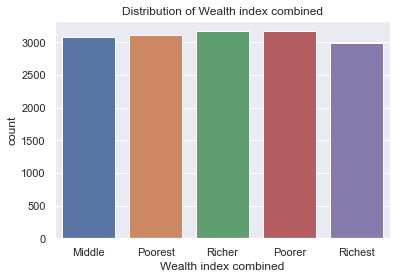

In [924]:
# #ns.set(style="darkgrid")
# order=df["Wealth index combined"].sort_values()
# sns.displot(data=df["Wealth index combined"])
# plt.title("Children Number Distribution")
# plt.show()

wg=sns.countplot(data=df,x='Wealth index combined')
wg.set_title('Distribution of Wealth index combined')

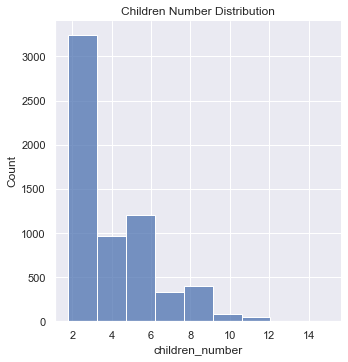

In [925]:
import seaborn as sns
import matplotlib.pyplot as plt
bins = np.linspace(df.children_number.mean(),df.children_number.max(),10)
sns.set(style="darkgrid")
order=df.children_number.sort_values()
sns.displot(data=order, bins=bins )
plt.title("Children Number Distribution")
plt.show()

In [926]:
Age_count=df_categoricals["Age_group"].value_counts().to_frame()
Age_count

,Age_group
15-19,3307
20-24,2773
25-29,2202
30-34,1919
35-39,1645
40-44,1308
45-49,1217
50+,1142


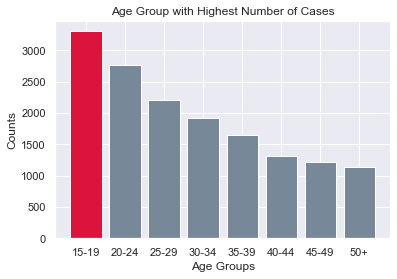

In [927]:
#data prep
dm=df_categoricals["Age_group"].value_counts()
dq=pd.DataFrame({'Age_group':dm.index, 'Counts':dm.values})
#color change
colors = ['lightslategray'] * 8
colors[0] = 'crimson'
plt.bar(dq.Age_group, dq.Counts, color=colors)
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title('Age Group with Highest Number of Cases')
plt.show()



In [928]:
marital_count=df_categoricals["marital status"].value_counts().to_frame()
marital_count


,marital status
Married,6328
Never in union,5760
cohabitation,1235
nan,1142
separated,797
Widowed,214
Divorced,37


In [929]:
Residence_count=df_categoricals["Residence_place"].value_counts().to_frame()
Residence_count


,Residence_place
Rural,9426
Urban,6087


In [930]:
education_count=df_categoricals["Highest educational level"].value_counts().to_frame()
education_count

,Highest educational level
Secondary,6946
Primary,4916
No education,2789
Higher,862


In [931]:
department_count=df_categoricals["Departement"].value_counts().to_frame()
department_count

,Departement
Ouest,3692
Artibonite,1896
Nord-Ouest,1561
Nord,1553
Sud,1283
Centre,1212
Nord-Est,1178
Sud-Est,1141
Grand'Anse,1028
Nippes,969


Text(0.5, 1.0, 'Distribution of the data by Departement')

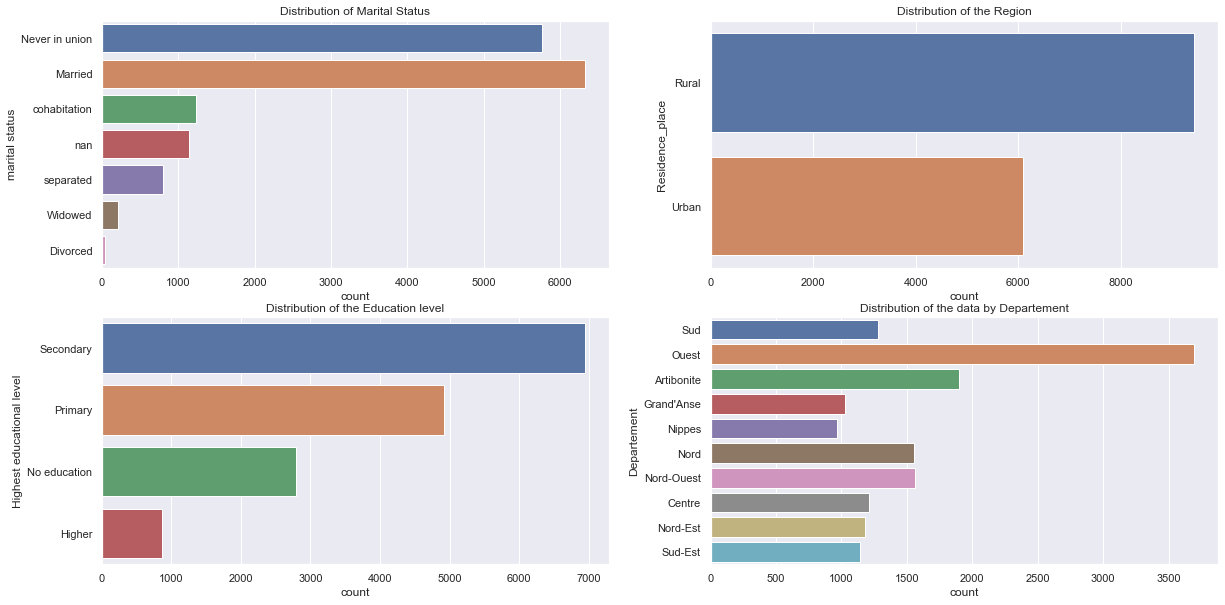

In [932]:
fig,ax=plt.subplots(2,2, figsize=(20,10))
sns.countplot(data=df,y='marital status',ax=ax[0,0])
ax[0,0].set_title('Distribution of Marital Status')

#total = sum(marital_count['marital status'])
# for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_width()/total)
#         x = p.get_x() + p.get_width()/2
#         y = p.get_y() + p.get_height()/2
#         ax.annotate(percentage, (x, y),fontsize=16,color="black")

sns.countplot(data=df,y='Residence_place',ax=ax[0,1])
ax[0,1].set_title('Distribution of the Region')

sns.countplot(data=df,y='Highest educational level',ax=ax[1,0])
ax[1,0].set_title('Distribution of the Education level')

sns.countplot(data=df,y='Departement',ax=ax[1,1])
ax[1,1].set_title('Distribution of the data by Departement')



,Bank_Account,Bank_Percent
No,13460,0.867659
Yes,2053,0.132341


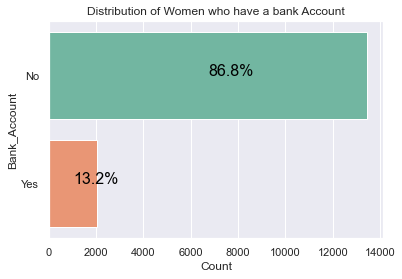

In [933]:
# countplt, ax = plt.subplots(figsize = (5,5))
# ax=sns.countplot(x ='Bank_Account', data = df_categoricals, palette = "Set2")

Bank =df["Bank_Account"].value_counts(normalize=False).to_frame()
Bank.rename(columns={"Bank_Acount":"Bank_Total"}, inplace=True)
Bank_percent=df["Bank_Account"].value_counts(normalize=True).to_frame()
Bank_percent.rename(columns={"Bank_Account":"Bank_Percent"},inplace=True)
Bank_f= pd.concat([Bank,Bank_percent], axis=1)
display(Bank_f)
total = len(df['Bank_Account'])*1.
ax = sns.countplot(y="Bank_Account", data=df,palette = "Set2")
plt.title('Distribution of Women who have a bank Account')
plt.xlabel('Count')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [934]:
occupation_count=df_categoricals["Respondent_occupation"].value_counts().to_frame()
b = occupation_count.iloc[:5,:]
occupation_count

,Respondent_occupation
Not working and didn't work in last 12 months,6113
Commercant et assimilé,5681
Agriculteur,736
Personnel des services directs au particulier,569
Insituteur et assimilés,325
Not working and didnt work in last 12 months,249
Ouvrier qualifié de type artisanal,168
Profession intermediare de la sante et du travail social,101
Ouvrier qualifié de type industriel,80
Employé administratif du secteur privé,79


In [935]:
bb = b.reset_index()
bb

,index,Respondent_occupation
0,Not working and didn't work in last 12 months,6113
1,Commercant et assimilé,5681
2,Agriculteur,736
3,Personnel des services directs au particulier,569
4,Insituteur et assimilés,325


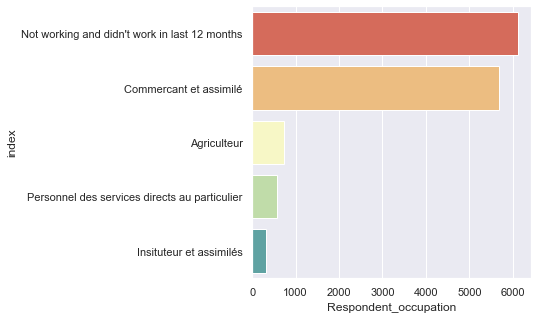

In [936]:
# df_c = df.iloc[:, 1:].eq(1).sum().rename_axis('Feature').reset_index(name='Cou‌nt')
# df_c = df_c.sort_values('Cou‌nt')
plt.figure(figsize=(5,5))
ax= sns.barplot(x="Respondent_occupation", y="index", data=bb, palette=sns.color_palette("Spectral", 5))
plt.title("")
plt.show()
total = sum(bb['Respondent_occupation'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(p.get_width())
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=10,color="blue")

## Multivariate Analysis

In [937]:
def Bank(x):
    pivo=pd.pivot_table(df, values='Case Identification', index=[x], columns="Bank_Account",aggfunc='count')
    pivo.rename(columns={"Yes":"Have an Account","No":"Dont have Account"}, inplace=True)
    pivo.fillna(0)
   

    pivo2=pd.pivot_table(df, values='Case Identification', index=[x], columns="currently_working",aggfunc='count')
    pivo2.rename(columns={"Yes":"Working","No":"dont working"},inplace=True)
    pivo2.fillna(0)
   



    pivo3=pd.pivot_table(df, values='Case Identification', index=[x], columns="Spend earnings",aggfunc='count')
    pivo3.fillna(0)
    


    return pivo, pivo2, pivo3




In [938]:
Bank_Residence,work_residence,spend_residence = Bank("Residence_place")
# Bank_Residence.plot(kind="bar")
Bank_Residence["have_an_account_percent"]= Bank_Residence["Have an Account"]/(Bank_Residence["Dont have Account"]+Bank_Residence["Have an Account"])
Bank_Residence
Bank_Residence

Bank_Account,Dont have Account,Have an Account,have_an_account_percent
Residence_place,,,
Rural,8701,725,0.076915
Urban,4759,1328,0.218170


In [939]:
spend_residence["Respondent_alone_percent"]= spend_residence["Respondent alone"]/(spend_residence["Respondent alone"]+spend_residence["Husband/partner alone"]+spend_residence["Respondent and husband/partner"]+spend_residence["Someone else"])
spend_residence["Respondent_and_partner_percent"]= spend_residence["Respondent and husband/partner"]/(spend_residence["Respondent alone"]+spend_residence["Husband/partner alone"]+spend_residence["Respondent and husband/partner"]+spend_residence["Someone else"])
# spend_residence.drop(["Someone else"],axis=1,inplace=True)
display(spend_residence)



sr = pd.crosstab(df["Spend earnings"], df["Residence_place"])        
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(sr)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
#print("Whether or not a person has full control over his or her earnings does not depend on whether that person is from an urban or rural area, but the contingency table shows that 50 percent of people from urban areas spend their earnings alone ")

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else,Respondent_alone_percent,Respondent_and_partner_percent
Residence_place,,,,,,
Rural,122,1397,2096,1,0.386338,0.579646
Urban,52,996,907,1,0.509202,0.463701


stat=78.554898, p=0.000000
Probably dependent


In [940]:
Bank_status,work_status,spend_status=Bank("marital status")
Bank_status["Have_an_Account_percent"]= Bank_status["Have an Account"]/(Bank_status["Have an Account"]+Bank_status["Dont have Account"])
display(Bank_status)



bs = pd.crosstab(df["marital status"], df["Bank_Account"])        
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(bs)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
print("The test proves that being married, divorced, single, widowed or otherwise has no bearing on whether a woman has a bank account or not.")

Bank_Account,Dont have Account,Have an Account,Have_an_Account_percent
marital status,,,
Divorced,31,6,0.162162
Married,5277,1051,0.166087
Never in union,5242,518,0.089931
Widowed,182,32,0.149533
cohabitation,1030,205,0.165992
nan,1039,103,0.090193
separated,659,138,0.173149


stat=195.226814, p=0.000000
Probably dependent
The test proves that being married, divorced, single, widowed or otherwise has no bearing on whether a woman has a bank account or not.


<AxesSubplot:xlabel='Residence_place'>

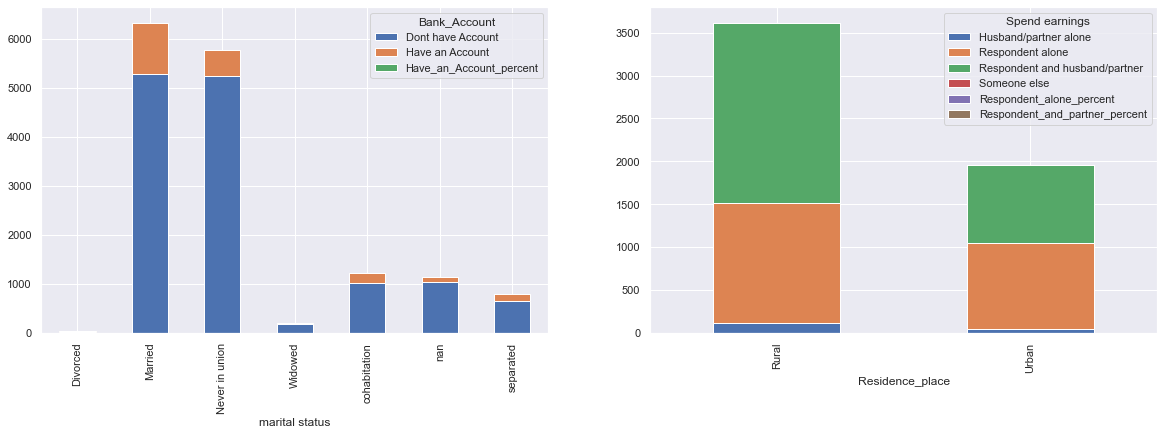

In [941]:
fig,axes=plt.subplots(ncols=2, figsize=(20,6))
Bank_status.plot(kind="bar", stacked=True, ax=axes[0])
spend_residence.plot(kind="bar", stacked=True, ax=axes[1])

In [942]:
work_status["working_percent"]= work_status["Working"]/(work_status["Working"]+work_status["dont working"])
display(work_status)



ws = pd.crosstab(df["marital status"], df["currently_working"])        
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(ws)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
#print("marital status has no influence on a woman's work.")


currently_working,dont working,Working,working_percent
marital status,,,
Divorced,17,20,0.540541
Married,2475,3853,0.608881
Never in union,4687,1073,0.186285
Widowed,68,146,0.682243
cohabitation,604,631,0.510931
separated,320,477,0.598494


stat=2402.671485, p=0.000000
Probably dependent


In [943]:
spend_status["Someone else"].fillna(0, inplace = True) 
spend_status["Respondent_alone_percent"]= spend_status["Respondent alone"]/(spend_status["Husband/partner alone"]+spend_status["Respondent alone"]+spend_status["Respondent and husband/partner"]+spend_status["Someone else"])
spend_status["Respondent_and_partner_percent"]= spend_status["Respondent and husband/partner"]/(spend_status["Respondent alone"]+spend_status["Husband/partner alone"]+spend_status["Respondent and husband/partner"]+spend_status["Someone else"])
spend_status.drop(["Someone else"],axis=1,inplace=True)
display(spend_status)

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Respondent_alone_percent,Respondent_and_partner_percent
marital status,,,,,
Married,150.0,1759.0,2835.0,0.370784,0.597597
cohabitation,24.0,634.0,168.0,0.765700,0.202899


In [944]:
ss = pd.crosstab(df['marital status'], df['Spend earnings']) 
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(ss)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
#print("the marital status of the woman has no influence on the work that she spends her money alone.")

stat=471.391776, p=0.000000
Probably dependent


In [945]:
Bank_education,work_education,spend_education= Bank("Highest educational level")
Bank_education["Have_an_Account_percent"]= Bank_education["Have an Account"]/(Bank_education["Have an Account"]+Bank_education["Dont have Account"])
display(Bank_education)

Bank_education.reset_index(inplace=True)

be = pd.crosstab(df["Highest educational level"], df["Bank_Account"])        
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(be)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
#print("the marital status of the woman has no influence on the work that she spends her money alone.")


Bank_Account,Dont have Account,Have an Account,Have_an_Account_percent
Highest educational level,,,
Higher,347,515,0.597448
No education,2698,91,0.032628
Primary,4613,303,0.061635
Secondary,5802,1144,0.164699


stat=2142.803721, p=0.000000
Probably dependent


In [946]:
work_education["working_percent"]= work_education["Working"]/(work_education["Working"]+work_education["dont working"])
display(work_education)

we=pd.crosstab(df["currently_working"],df["Highest educational level"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(we)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
#print("the marital status of the woman has no influence on the work that she spends her money alone.")

currently_working,dont working,Working,working_percent
Highest educational level,,,
Higher,438,415,0.486518
No education,756,1267,0.626298
Primary,2476,2158,0.465688
Secondary,4501,2360,0.343973


stat=559.830953, p=0.000000
Probably dependent


In [947]:
spend_education["Someone else"].fillna(0, inplace = True) 
spend_education["Respondent_alone_percent"]= spend_education["Respondent alone"]/(spend_education["Husband/partner alone"]+spend_education["Respondent alone"]+spend_education["Respondent and husband/partner"]+spend_education["Someone else"])
spend_education["Respondent_and_partner_percent"]= spend_education["Respondent and husband/partner"]/(spend_education["Respondent alone"]+spend_education["Husband/partner alone"]+spend_education["Respondent and husband/partner"])
spend_education.drop(["Someone else"],axis=1,inplace=True)
display(spend_education)

se=pd.crosstab(df["Spend earnings"],df["Highest educational level"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Respondent_alone_percent,Respondent_and_partner_percent
Highest educational level,,,,,
Higher,5.0,88.0,135.0,0.385965,0.592105
No education,51.0,539.0,679.0,0.424744,0.535067
Primary,67.0,885.0,1188.0,0.413551,0.555140
Secondary,51.0,881.0,1001.0,0.455297,0.517848


stat=18.415976, p=0.030643
Probably dependent


In [948]:
Bank_religion,work_religion,spend_religion= Bank("Religion")
Bank_religion.fillna(0, inplace = True) 
Bank_religion["Have_an_Account_percent"]= Bank_religion["Have an Account"]/(Bank_religion["Have an Account"]+Bank_religion["Dont have Account"])
Bank_religion.drop(["Other"],axis=0,inplace=True)

se=pd.crosstab(df["Religion"],df["Bank_Account"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=66.996248, p=0.000000
Probably dependent


In [949]:
work_religion["working_percent"]= work_religion["Working"]/(work_religion["Working"]+work_religion["dont working"])
work_religion.drop(["Other"], axis=0, inplace=True)
display(work_religion)

se=pd.crosstab(df["Religion"],df["currently_working"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

currently_working,dont working,Working,working_percent
Religion,,,
Catholic,2958.0,2541.0,0.462084
No religion,603.0,353.0,0.369247
Protestant,4549.0,3213.0,0.413940
Vaudousant,60.0,93.0,0.607843


stat=65.985439, p=0.000000
Probably dependent


In [950]:
spend_religion["Someone else"].fillna(0,inplace=True)
spend_religion["Respondent_and_partner_percent"]= spend_religion["Respondent and husband/partner"]/(spend_religion["Respondent alone"]+spend_religion["Husband/partner alone"]+spend_religion["Respondent and husband/partner"])
spend_religion["Respondent_alone_percent"]= spend_religion["Respondent alone"]/(spend_religion["Husband/partner alone"]+spend_religion["Respondent alone"]+spend_religion["Respondent and husband/partner"]+spend_religion["Someone else"])

display(spend_religion)

se=pd.crosstab(df["Religion"],df["Spend earnings"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else,Respondent_and_partner_percent,Respondent_alone_percent
Religion,,,,,,
Catholic,68.0,1032.0,1257.0,1.0,0.533305,0.437659
No religion,15.0,197.0,145.0,0.0,0.406162,0.551821
Protestant,87.0,1106.0,1570.0,1.0,0.568223,0.400145
Vaudousant,4.0,58.0,31.0,0.0,0.333333,0.623656


stat=52.341900, p=0.000000
Probably dependent


In [951]:
Bank_age,work_age,spend_age= Bank("Age_group")
Bank_age["Have_an_Account_percent"]= Bank_age["Have an Account"]/(Bank_age["Have an Account"]+Bank_age["Dont have Account"])
display(Bank_age)

se=pd.crosstab(df["Age_group"],df["Bank_Account"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


Bank_Account,Dont have Account,Have an Account,Have_an_Account_percent
Age_group,,,
15-19,3272,35,0.010584
20-24,2506,267,0.096286
25-29,1788,414,0.188011
30-34,1461,458,0.238666
35-39,1296,349,0.212158
40-44,1056,252,0.192661
45-49,1042,175,0.143796
50+,1039,103,0.090193


stat=858.483516, p=0.000000
Probably dependent


In [952]:
work_age["working_percent"]= work_age["Working"]/(work_age["Working"]+work_age["dont working"])

display(work_age)
se=pd.crosstab(df["Age_group"],df["currently_working"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

currently_working,dont working,Working,working_percent
Age_group,,,
15-19,3030,277,0.083762
20-24,2012,761,0.274432
25-29,1093,1109,0.503633
30-34,772,1147,0.597707
35-39,546,1099,0.668085
40-44,375,933,0.713303
45-49,343,874,0.718159


stat=3378.433808, p=0.000000
Probably dependent


In [953]:
spend_age["Someone else"].fillna(0,inplace=True)
spend_age["Respondent_and_partner_percent"]= spend_age["Respondent and husband/partner"]/(spend_age["Respondent alone"]+spend_age["Husband/partner alone"]+spend_age["Respondent and husband/partner"])
spend_age["Respondent_alone_percent"]= spend_age["Respondent alone"]/(spend_age["Husband/partner alone"]+spend_age["Respondent alone"]+spend_age["Respondent and husband/partner"]+spend_age["Someone else"])
display(spend_age)

se=pd.crosstab(df["Age_group"],df["Spend earnings"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else,Respondent_and_partner_percent,Respondent_alone_percent
Age_group,,,,,,
15-19,4.0,41.0,39.0,1.0,0.464286,0.482353
20-24,29.0,286.0,282.0,0.0,0.472362,0.479062
25-29,33.0,426.0,524.0,0.0,0.533062,0.433367
30-34,23.0,482.0,619.0,1.0,0.550712,0.428444
35-39,26.0,476.0,590.0,0.0,0.540293,0.435897
40-44,31.0,370.0,519.0,0.0,0.564130,0.402174
45-49,28.0,312.0,430.0,0.0,0.558442,0.405195


stat=61.453903, p=0.000001
Probably dependent


In [954]:
Bank_departement,work_departement,spend_departement= Bank("Departement")
Bank_departement["Have_an_Account_percent"]= Bank_departement["Have an Account"]/(Bank_departement["Have an Account"]+Bank_departement["Dont have Account"])
Bank_departement

Bank_Account,Dont have Account,Have an Account,Have_an_Account_percent
Departement,,,
Artibonite,1694,202,0.106540
Centre,1073,139,0.114686
Grand'Anse,943,85,0.082685
Nippes,872,97,0.100103
Nord,1318,235,0.151320
Nord-Est,1054,124,0.105263
Nord-Ouest,1371,190,0.121717
Ouest,3024,668,0.180932
Sud,1110,173,0.134840


In [955]:
work_departement["working_percent"]= work_departement["Working"]/(work_departement["Working"]+work_departement["dont working"])

work_departement

currently_working,dont working,Working,working_percent
Departement,,,
Artibonite,966,782,0.447368
Centre,661,467,0.414007
Grand'Anse,548,393,0.417641
Nippes,505,378,0.428086
Nord,865,579,0.400970
Nord-Est,632,464,0.423358
Nord-Ouest,834,613,0.423635
Ouest,1903,1582,0.453945
Sud,689,483,0.412116


In [956]:
spend_departement["Someone else"].fillna(0,inplace=True)
spend_departement["Respondent_and_partner_percent"]= spend_departement["Respondent and husband/partner"]/(spend_departement["Respondent alone"]+spend_departement["Husband/partner alone"]+spend_departement["Respondent and husband/partner"])
spend_departement["Respondent_alone_percent"]= spend_departement["Respondent alone"]/(spend_departement["Husband/partner alone"]+spend_departement["Respondent alone"]+spend_departement["Respondent and husband/partner"]+spend_departement["Someone else"])
spend_departement.drop(["Someone else"],axis=1,inplace=True)
spend_departement

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Respondent_and_partner_percent,Respondent_alone_percent
Departement,,,,,
Artibonite,16.0,336.0,354.0,0.501416,0.475921
Centre,21.0,180.0,261.0,0.564935,0.389610
Grand'Anse,13.0,125.0,260.0,0.653266,0.314070
Nippes,6.0,146.0,216.0,0.586957,0.395664
Nord,17.0,252.0,242.0,0.473581,0.493151
Nord-Est,12.0,166.0,259.0,0.592677,0.378995
Nord-Ouest,16.0,231.0,344.0,0.582064,0.390863
Ouest,42.0,645.0,595.0,0.464119,0.503120
Sud,16.0,152.0,254.0,0.601896,0.360190


## Among the people who come from the department of Artibonite, there are 40.37% who spend their money alone

In [957]:
Bank_children,work_children,spend_children= Bank("children_number")
Bank_children["Have_an_Account_percent"]= Bank_children["Have an Account"]/(Bank_children["Dont have Account"]+Bank_children["Have an Account"])*100
Bank_children.drop([13,14,15],axis=0,inplace=True)
Bank_children

Bank_Account,Dont have Account,Have an Account,Have_an_Account_percent
children_number,,,
0,6191.0,715.0,10.353316
1,1839.0,472.0,20.424059
2,1516.0,379.0,20.000000
3,1126.0,222.0,16.468843
4,847.0,118.0,12.227979
5,647.0,76.0,10.511757
6,454.0,30.0,6.198347
7,308.0,20.0,6.097561
8,244.0,10.0,3.937008


In [958]:
work_children["working_percent"]= work_children["Working"]/(work_children["Working"]+work_children["dont working"])
display(work_children)

se=pd.crosstab(df["children_number"],df["currently_working"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

currently_working,dont working,Working,working_percent
children_number,,,
0,4628.0,1136.0,0.197085
1,1224.0,1087.0,0.470359
2,806.0,1089.0,0.574670
3,527.0,821.0,0.609050
4,328.0,637.0,0.660104
5,229.0,494.0,0.683264
6,158.0,326.0,0.673554
7,110.0,218.0,0.664634
8,75.0,179.0,0.704724


stat=2394.105370, p=0.000000
Probably dependent


In [959]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [960]:
a=pd.pivot_table(data=df, index=["Wealth index combined"], values="Case Identification", columns="Highest educational level", aggfunc="count",margins=True, fill_value=0)
display(a)

wh=pd.crosstab(df["Wealth index combined"],df["Highest educational level"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


Highest educational level,Higher,No education,Primary,Secondary,All
Wealth index combined,,,,,
Middle,73,487,1017,1504,3081
Poorer,19,763,1287,1099,3168
Poorest,2,1184,1387,531,3104
Richer,184,260,812,1909,3165
Richest,584,95,413,1903,2995
All,862,2789,4916,6946,15513


stat=2394.105370, p=0.000000
Probably dependent


children_group,0-5,> 5,All
Wealth index combined,,,
Middle,1316,1765,3081
Poorer,1378,1790,3168
Poorest,1115,1989,3104
Richer,1454,1711,3165
Richest,1643,1352,2995
All,6906,8607,15513


stat=2394.105370, p=0.000000
Probably dependent


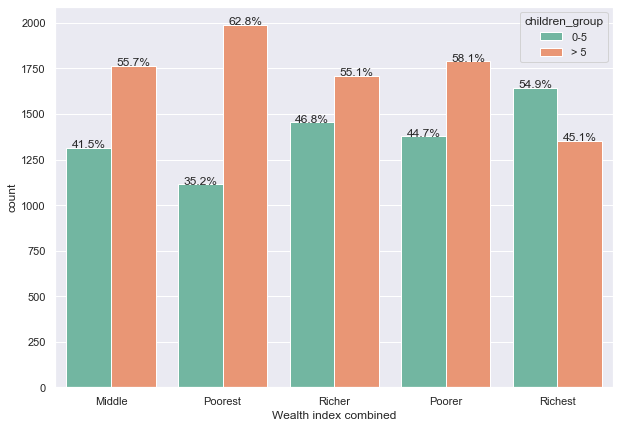

In [961]:
b=pd.pivot_table(data=df, index=["Wealth index combined"], values="Case Identification", columns="children_group", aggfunc="count",margins=True, fill_value=0)
display(b)

wh=pd.crosstab(df["Wealth index combined"],df["children_group"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

plt.figure(figsize=(10,7))
ax = sns.countplot(x="Wealth index combined", hue="children_group", data=df, palette="Set2")
with_hue(ax,df["Wealth index combined"], 5, 2)

marital status,Divorced,Married,Never in union,Widowed,cohabitation,nan,separated,All
Wealth index combined,,,,,,,,
Middle,5,1252,1100,40,255,228,201,3081
Poorer,3,1361,1088,41,245,305,125,3168
Poorest,8,1561,854,50,225,290,116,3104
Richer,12,1159,1299,47,280,164,204,3165
Richest,9,995,1419,36,230,155,151,2995
All,37,6328,5760,214,1235,1142,797,15513


stat=2394.105370, p=0.000000
Probably dependent


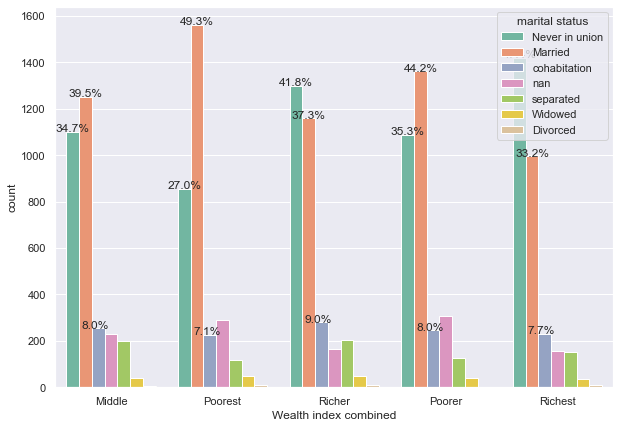

In [962]:
a=pd.pivot_table(data=df, index=["Wealth index combined"], values="Case Identification", columns="marital status", aggfunc="count",margins=True, fill_value=0)
display(a)

wh=pd.crosstab(df["Wealth index combined"],df["marital status"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

plt.figure(figsize=(10,7))
ax = sns.countplot(x="Wealth index combined", hue="marital status", data=df, palette="Set2")
with_hue(ax,df["Wealth index combined"], 5, 3)

In [963]:
a=pd.pivot_table(data=df, index=["Wealth index combined"], values="Case Identification", columns="Departement", aggfunc="count",margins=True, fill_value=0)
display(a)

wh=pd.crosstab(df["Wealth index combined"],df["Departement"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')



Departement,Artibonite,Centre,Grand'Anse,Nippes,Nord,Nord-Est,Nord-Ouest,Ouest,Sud,Sud-Est,All
Wealth index combined,,,,,,,,,,,
Middle,305,244,185,280,322,240,296,569,318,322,3081
Poorer,417,291,246,278,285,264,359,340,297,391,3168
Poorest,466,395,423,194,267,248,365,273,269,204,3104
Richer,391,149,116,146,335,291,333,1030,260,114,3165
Richest,317,133,58,71,344,135,208,1480,139,110,2995
All,1896,1212,1028,969,1553,1178,1561,3692,1283,1141,15513


stat=2394.105370, p=0.000000
Probably dependent


In [964]:
a=pd.pivot_table(data=df, index=["Wealth index combined"], values="Case Identification", columns="Age_group", aggfunc="count",margins=True, fill_value=0)
display(a)

wh=pd.crosstab(df["Wealth index combined"],df["Age_group"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Age_group,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50+,All
Wealth index combined,,,,,,,,,
Middle,667,557,431,391,310,250,247,228,3081
Poorer,725,545,404,324,335,275,255,305,3168
Poorest,681,491,362,353,338,281,308,290,3104
Richer,658,620,510,410,328,258,217,164,3165
Richest,576,560,495,441,334,244,190,155,2995
All,3307,2773,2202,1919,1645,1308,1217,1142,15513


stat=2394.105370, p=0.000000
Probably dependent


Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else,All
Wealth index combined,,,,,
Middle,38,506,577,0,1121
Poorer,39,447,705,1,1192
Poorest,44,476,718,0,1238
Richer,33,527,528,1,1089
Richest,20,437,475,0,932
All,174,2393,3003,2,5572


stat=2394.105370, p=0.000000
Probably dependent


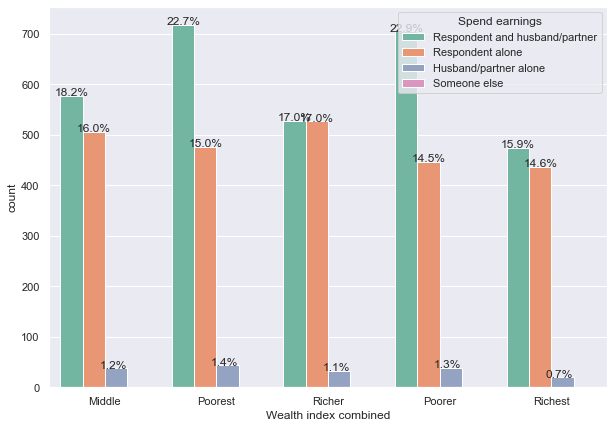

In [965]:
a=pd.pivot_table(data=df, index=["Wealth index combined"], values="Case Identification", columns="Spend earnings", aggfunc="count",margins=True, fill_value=0)
display(a)

wh=pd.crosstab(df["Wealth index combined"],df["Spend earnings"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

plt.figure(figsize=(10,7))
ax = sns.countplot(x="Wealth index combined", hue="Spend earnings", data=df, palette="Set2")
with_hue(ax,df["Wealth index combined"], 5, 3)

Residence_place,Rural,Urban,All
Wealth index combined,,,
Middle,2017,1064,3081
Poorer,2919,249,3168
Poorest,3070,34,3104
Richer,911,2254,3165
Richest,509,2486,2995
All,9426,6087,15513


stat=2394.105370, p=0.000000
Probably dependent


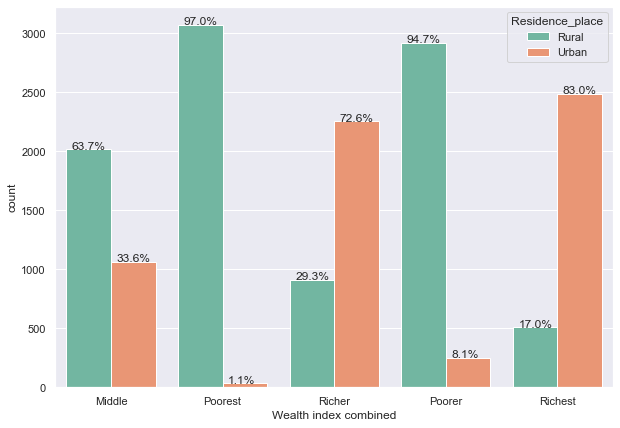

In [966]:
a=pd.pivot_table(data=df, index=["Wealth index combined"], values="Case Identification", columns="Residence_place", aggfunc="count",margins=True, fill_value=0)
display(a)

wh=pd.crosstab(df["Wealth index combined"],df["Residence_place"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

plt.figure(figsize=(10,7))
ax = sns.countplot(x="Wealth index combined", hue="Residence_place", data=df, palette="Set2")
with_hue(ax,df["Wealth index combined"], 5, 2)

In [967]:
#spend_children["Someone else"].fillna(0,inplace=True)
spend_children["Respondent_and_partner_percent"]= spend_children["Respondent and husband/partner"]/(spend_children["Respondent alone"]+spend_children["Husband/partner alone"]+spend_children["Respondent and husband/partner"])
spend_children["Respondent_alone_percent"]= spend_children["Respondent alone"]/(spend_children["Husband/partner alone"]+spend_children["Respondent alone"]+spend_children["Respondent and husband/partner"]+spend_children["Someone else"])
#spend_children.drop(["Someone else"],axis=1,inplace=True)
spend_children.fillna(0,inplace=True)
display(spend_children)

se=pd.crosstab(df["children_number"],df["Spend earnings"])
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(se)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')



Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else,Respondent_and_partner_percent,Respondent_alone_percent
children_number,,,,,,
0,12.0,137.0,173.0,1.0,0.537267,0.424149
1,34.0,533.0,487.0,0.0,0.462049,0.000000
2,36.0,520.0,589.0,1.0,0.514410,0.453752
3,21.0,387.0,454.0,0.0,0.526682,0.000000
4,23.0,253.0,405.0,0.0,0.594714,0.000000
5,14.0,181.0,298.0,0.0,0.604462,0.000000
6,15.0,151.0,186.0,0.0,0.528409,0.000000
7,7.0,90.0,137.0,0.0,0.585470,0.000000
8,8.0,71.0,114.0,0.0,0.590674,0.000000


stat=91.182448, p=0.000056
Probably dependent


In [968]:
# sns.set(style="darkgrid")
# sns.histplot(data=df, x="children_group")

In [969]:

ch_s=pd.pivot_table(df, values='Case Identification', index=["Spend earnings"], columns="children_group",aggfunc='count')
ch_s



children_group,0-5,> 5
Spend earnings,,
Husband/partner alone,12,162
Respondent alone,137,2256
Respondent and husband/partner,173,2830
Someone else,1,1


In [970]:
group= df.groupby(["currently_working","Spend earnings"])["Case Identification"].count().to_frame()
group

Case Identification
currently_working Spend earnings                                     
No                Husband/partner alone                            34
                  Respondent alone                                502
                  Respondent and husband/partner                  581
Yes               Husband/partner alone                           140
                  Respondent alone                               1891
                  Respondent and husband/partner                 2422
                  Someone else                                      2

In [971]:
group1= df.groupby(["currently_working","Respondent_occupation","Spend earnings"])["Case Identification"].count().to_frame().sort_values(by="Case Identification",ascending=False)
group1

Case Identification
currently_working Respondent_occupation                         Spend earnings                                     
Yes               Commercant et assimilé                        Respondent and husband/partner                 1792
                                                                Respondent alone                               1392
No                Commercant et assimilé                        Respondent and husband/partner                  481
                                                                Respondent alone                                390
Yes               Agriculteur                                   Respondent and husband/partner                  294
...                                                                                                             ...
                  Ingenieur ou cadre technique d'entreprise     Respondent and husband/partner                    1
                  Employé ou agent de service du secteur public Respondent and husband/partner                    1
                                                                Respondent alone                                  1
                  Commercant et assimilé                        Someone else                                      1
No                Personnel des services directs au particulier Husband/partner alone                             1

[89 rows x 1 columns]

In [972]:
#df["Residence_place"]= df["Residence_place"].apply(lambda x: str(x).replace('Aire Metropolitaine','Ouest'))

In [973]:
#categories_to_test = ['age','gender','merchant','category']
crosstab = pd.crosstab(df["Bank_Account"], df["currently_working"])
crosstab1 = pd.crosstab(df["Bank_Account"], df["Respondent_occupation"])

In [974]:
crosstab

currently_working,No,Yes
Bank_Account,,
No,7455,4966
Yes,716,1234


In [975]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    

stat=372.107, p=0.000
Probably dependent


In [976]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=1744.395, p=0.000
Probably dependent


## MODELLING


## Target Variable Creation

In [977]:
score_col=["Bank_Account","Spend earnings","currently_working"]
score_col

['Bank_Account', 'Spend earnings', 'currently_working']

In [978]:
df[score_col]

,Bank_Account,Spend earnings,currently_working
0,No,NaN,No
1,No,NaN,No
2,No,NaN,No
3,Yes,Respondent and husband/partner,Yes
4,No,Respondent and husband/partner,No
...,...,...,...
15508,No,NaN,NaN
15509,No,NaN,No
15510,Yes,NaN,Yes
15511,Yes,NaN,No


In [979]:
df["Spend earnings"].fillna("Unknown",inplace=True)

In [980]:
df=pd.get_dummies(df, columns=['Wealth index combined'])
df


,Case Identification,Respondent year of birth,Age,Age_group,Departement,Residence_place,Highest educational level,Religion,Education in single years,Bank_Account,...,marital status,currently_working,Respondent_occupation,Spend earnings,children_group,Wealth index combined_Middle,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest
0,1 1 3,1999,18,15-19,Sud,Rural,Secondary,Protestant,10,No,...,Never in union,No,Not working and didnt work in last 12 months,Unknown,0-5,1,0,0,0,0
1,1 3 3,1988,28,25-29,Sud,Rural,Secondary,Catholic,11,No,...,Never in union,No,Commercant et assimilé,Unknown,0-5,0,0,1,0,0
2,1 3 4,1999,18,15-19,Sud,Rural,Primary,Catholic,4,No,...,Never in union,No,Not working and didnt work in last 12 months,Unknown,0-5,0,0,1,0,0
3,1 17 2,1983,33,30-34,Sud,Rural,Secondary,Protestant,12,Yes,...,Married,Yes,Insituteur et assimilés,Respondent and husband/partner,> 5,0,0,0,1,0
4,1 19 2,1989,28,25-29,Sud,Rural,Secondary,Protestant,13,No,...,Married,No,Insituteur et assimilés,Respondent and husband/partner,0-5,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,450 92 2,1958,58,50+,Ouest,Urban,Primary,Protestant,6,No,...,nan,NaN,NaN,Unknown,0-5,0,0,0,0,1
15509,450 92 4,1990,26,25-29,Ouest,Urban,Higher,Protestant,16,No,...,Never in union,No,Not working and didnt work in last 12 months,Unknown,0-5,0,0,0,0,1
15510,450 93 1,1982,34,30-34,Ouest,Urban,Higher,Protestant,15,Yes,...,Never in union,Yes,Employé administratif du secteur privé,Unknown,0-5,0,0,0,0,1
15511,450 93 3,1982,34,30-34,Ouest,Urban,Higher,Protestant,16,Yes,...,Never in union,No,Commercant et assimilé,Unknown,0-5,0,0,0,0,1


In [981]:
df["Bank_Account"] = df["Bank_Account"].apply(lambda x: 0 if x=="No" else 1)

In [982]:
# df["Wealth index combined"]= df["Wealth index combined"] 

In [983]:
df["Respondent_occupation"] = df["Respondent_occupation"].apply(lambda x: 0 if x=="Not working and didn't work in last 12 months" else 1)

In [984]:
df["Spend earnings"]=df["Spend earnings"].apply(lambda x: 1 if x in ['Respondent alone','Respondent and husband/partner'] else 0)
df['currently_working'] = df['currently_working'].apply(lambda x: 1 if x=="Yes" else 0)

In [985]:
# for col in score_col:
#     print(col,df[col].unique())

In [986]:
""""df['target'] =np.nan
filter1 = df[df['currently_working']==1 and df["Spend earnings"]==1 and df["Respondent occupation"]==1]
filter1
# filter2 = df[df['Spend earnings']=="Respondent alone"]
# filter3 =  df[df["Respondent_occupation"]=="Yes"]
# filter4 =  df[df["currently_working"]=="No"]
# filter5 =  df[df["Spend earnings"]=="No"]
# filter6 =  df[df["Respondent_occupation"]]""" 
# df["Spend earnings"].unique()

'"df[\'target\'] =np.nan\nfilter1 = df[df[\'currently_working\']==1 and df["Spend earnings"]==1 and df["Respondent occupation"]==1]\nfilter1\n# filter2 = df[df[\'Spend earnings\']=="Respondent alone"]\n# filter3 =  df[df["Respondent_occupation"]=="Yes"]\n# filter4 =  df[df["currently_working"]=="No"]\n# filter5 =  df[df["Spend earnings"]=="No"]\n# filter6 =  df[df["Respondent_occupation"]]'

In [987]:
df.columns

Index(['Case Identification', 'Respondent year of birth', 'Age', 'Age_group',
       'Departement', 'Residence_place', 'Highest educational level',
       'Religion', 'Education in single years', 'Bank_Account',
       'children_number', 'marital status', 'currently_working',
       'Respondent_occupation', 'Spend earnings', 'children_group',
       'Wealth index combined_Middle', 'Wealth index combined_Poorer',
       'Wealth index combined_Poorest', 'Wealth index combined_Richer',
       'Wealth index combined_Richest'],
      dtype='object')

In [988]:

df["Score"] =df["Wealth index combined_Middle"]+3*df["Wealth index combined_Richer"]+5*df["Wealth index combined_Richest"]
df["score1"] = (df["Score"]-df["Score"].min())/(df["Score"].max()-df["Score"].min())
df["Financial_Independance"] = df["score1"].apply(lambda x: 1 if x>=0.7 else 0)

In [989]:
# df["Financial_Independance"]  =0
# df.loc[(df["Wealth index combined_Middle"] == 1) | (df["Wealth index combined_Richer"] == 1 )| (df["Wealth index combined_Richest"] == 1) ,"Financial_Independance"] =1

In [990]:
df.groupby(["Age_group"]).Financial_Independance.mean()

Age_group
15-19    0.174176
20-24    0.201947
25-29    0.224796
30-34    0.229807
35-39    0.203040
40-44    0.186544
45-49    0.156122
50+      0.135727
Name: Financial_Independance, dtype: float64

## Analyse of the women Financial Independence by: Departement, Religion, Age_group, Education level, number of children

In [991]:
df.fillna(0)

,Case Identification,Respondent year of birth,Age,Age_group,Departement,Residence_place,Highest educational level,Religion,Education in single years,Bank_Account,...,Spend earnings,children_group,Wealth index combined_Middle,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Score,score1,Financial_Independance
0,1 1 3,1999,18,15-19,Sud,Rural,Secondary,Protestant,10,0,...,0,0-5,1,0,0,0,0,1,0.2,0
1,1 3 3,1988,28,25-29,Sud,Rural,Secondary,Catholic,11,0,...,0,0-5,0,0,1,0,0,0,0.0,0
2,1 3 4,1999,18,15-19,Sud,Rural,Primary,Catholic,4,0,...,0,0-5,0,0,1,0,0,0,0.0,0
3,1 17 2,1983,33,30-34,Sud,Rural,Secondary,Protestant,12,1,...,1,> 5,0,0,0,1,0,3,0.6,0
4,1 19 2,1989,28,25-29,Sud,Rural,Secondary,Protestant,13,0,...,1,0-5,0,0,0,1,0,3,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,450 92 2,1958,58,50+,Ouest,Urban,Primary,Protestant,6,0,...,0,0-5,0,0,0,0,1,5,1.0,1
15509,450 92 4,1990,26,25-29,Ouest,Urban,Higher,Protestant,16,0,...,0,0-5,0,0,0,0,1,5,1.0,1
15510,450 93 1,1982,34,30-34,Ouest,Urban,Higher,Protestant,15,1,...,0,0-5,0,0,0,0,1,5,1.0,1
15511,450 93 3,1982,34,30-34,Ouest,Urban,Higher,Protestant,16,1,...,0,0-5,0,0,0,0,1,5,1.0,1


In [992]:
df["Respondent_occupation"]= df["Respondent_occupation"].apply(lambda x: str(x).replace("Not working and didn't work in last 12 months",'0'))

In [993]:
df.Financial_Independance.value_counts().to_frame()

,Financial_Independance
0,12518
1,2995


,Financial_Independance
0,0.806936
1,0.193064


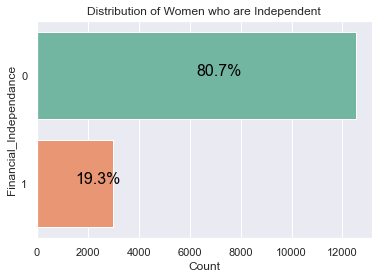

In [994]:
financial = df.Financial_Independance.value_counts(normalize=True).to_frame()
display(financial)
total = df['Financial_Independance'].shape[0]
ax = sns.countplot(y="Financial_Independance", data=df,palette = "Set2")
plt.title('Distribution of Women who are Independent')
plt.xlabel('Count')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [1021]:
df1=df[df["Financial_Independance"]==1]
df1

,Case Identification,Respondent year of birth,Age,Age_group,Departement,Residence_place,Highest educational level,Religion,Education in single years,Bank_Account,...,Spend earnings,children_group,Wealth index combined_Middle,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Score,score1,Financial_Independance
17,1 78 2,1975,41,40-44,Sud,Rural,Secondary,Protestant,12,1,...,1,0-5,0,0,0,0,1,5,1.0,1
18,1 78 4,1992,24,20-24,Sud,Rural,Secondary,Protestant,10,0,...,0,0-5,0,0,0,0,1,5,1.0,1
26,2 2 1,1993,23,20-24,Ouest,Urban,Secondary,Protestant,13,1,...,0,0-5,0,0,0,0,1,5,1.0,1
27,2 9 2,1994,22,20-24,Ouest,Urban,Secondary,Protestant,13,1,...,0,> 5,0,0,0,0,1,5,1.0,1
28,2 10 2,1952,64,50+,Ouest,Urban,Primary,Protestant,4,0,...,0,0-5,0,0,0,0,1,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,450 92 2,1958,58,50+,Ouest,Urban,Primary,Protestant,6,0,...,0,0-5,0,0,0,0,1,5,1.0,1
15509,450 92 4,1990,26,25-29,Ouest,Urban,Higher,Protestant,16,0,...,0,0-5,0,0,0,0,1,5,1.0,1
15510,450 93 1,1982,34,30-34,Ouest,Urban,Higher,Protestant,15,1,...,0,0-5,0,0,0,0,1,5,1.0,1
15511,450 93 3,1982,34,30-34,Ouest,Urban,Higher,Protestant,16,1,...,0,0-5,0,0,0,0,1,5,1.0,1


,marital status
Never in union,0.473790
Married,0.332220
cohabitation,0.076795
nan,0.051753
separated,0.050417
Widowed,0.012020
Divorced,0.003005


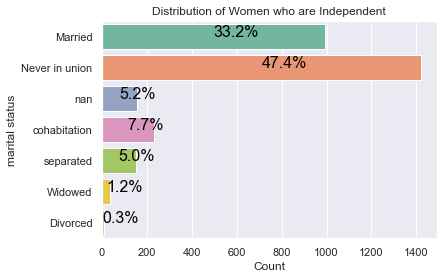

In [1024]:
marital = df1["marital status"].value_counts(normalize=True).to_frame()
display(marital)
total = df1['marital status'].shape[0]
ax = sns.countplot(y="marital status", data=df1,palette = "Set2")
plt.title('Distribution of Women who are Independent')
plt.xlabel('Count')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

,children_group
0-5,0.548581
> 5,0.451419


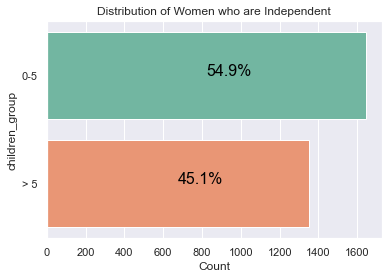

In [1026]:
children = df1["children_group"].value_counts(normalize=True).to_frame()
display(children)
total = df1['children_group'].shape[0]
ax = sns.countplot(y="children_group", data=df1,palette = "Set2")
plt.title('Distribution of Women who are Independent')
plt.xlabel('Count')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

,Departement
Ouest,0.494157
Nord,0.114858
Artibonite,0.105843
Nord-Ouest,0.069449
Sud,0.046411
Nord-Est,0.045075
Centre,0.044407
Sud-Est,0.036728
Nippes,0.023706
Grand'Anse,0.019366


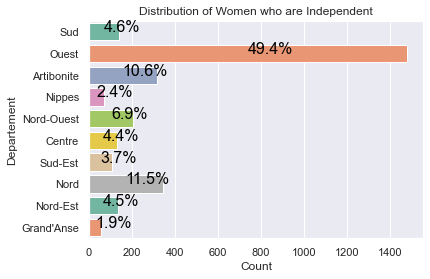

In [1028]:
Departement1 = df1["Departement"].value_counts(normalize=True).to_frame()
display(Departement1)
total = df1['Departement'].shape[0]
ax = sns.countplot(y="Departement", data=df1,palette = "Set2")
plt.title('Distribution of Women who are Independent')
plt.xlabel('Count')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

,Highest educational level
Secondary,0.635392
Higher,0.194992
Primary,0.137896
No education,0.031720


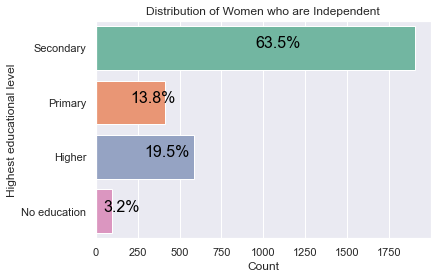

In [1029]:
education = df1["Highest educational level"].value_counts(normalize=True).to_frame()
display(education)
total = df1['Highest educational level'].shape[0]
ax = sns.countplot(y="Highest educational level", data=df1,palette = "Set2")
plt.title('Distribution of Women who are Independent')
plt.xlabel('Count')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

,Age_group
15-19,0.192321
20-24,0.186978
25-29,0.165275
30-34,0.147245
35-39,0.111519
40-44,0.081469
45-49,0.063439
50+,0.051753


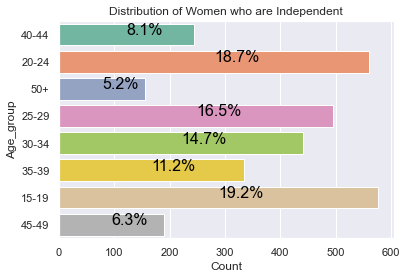

In [1030]:
Age = df1["Age_group"].value_counts(normalize=True).to_frame()
display(Age)
total = df1['Age_group'].shape[0]
ax = sns.countplot(y="Age_group", data=df1,palette = "Set2")
plt.title('Distribution of Women who are Independent')
plt.xlabel('Count')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [995]:
df["Case Identification"]

0               1   1  3
1               1   3  3
2               1   3  4
3               1  17  2
4               1  19  2
              ...       
15508         450  92  2
15509         450  92  4
15510         450  93  1
15511         450  93  3
15512         450  93  4
Name: Case Identification, Length: 15513, dtype: object

In [ ]:
def genrerate_test(data=df1,index='Age_group',colunms='Financial_Independance',aggfunc='count',title='',xlabel=' Financial Independence=Yes',values='Case Identification'):
    a=pd.pivot_table(data=data, index=index, values=values, columns=colunms, aggfunc=aggfunc,margins=True, fill_value=0)
    
    a[0]=a[0]/a["All"]
    a[1]=a[1]/a["All"]
    a=a.reset_index()
    a =a.sort_values(by=1, ascending=False)
    a=a[a[index]!='All']
    display(a)
    ax=sns.barplot(data=a,y=index,x=1,palette="Set2")
    plt.title(title)
    plt.xlabel(xlabel)
    for p in ax.patches:
        
        
            percentage = '{:.1f}%'.format(100 * p.get_width())
            x = p.get_x() + p.get_width()/2
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=10,color="black")

    crosstab2 = pd.crosstab(df[colunms], df[index])        
    from scipy import stats
    stat, p, dof, expected = stats.chi2_contingency(crosstab)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')


In [1017]:
def genrerate_test(data=df,index='Age_group',colunms='Financial_Independance',aggfunc='count',title='',xlabel=' Financial Independence=Yes',values='Case Identification'):
    a=pd.pivot_table(data=data, index=index, values=values, columns=colunms, aggfunc=aggfunc,margins=True, fill_value=0)
    
    a[0]=a[0]/a["All"]
    a[1]=a[1]/a["All"]
    a=a.reset_index()
    a =a.sort_values(by=1, ascending=False)
    a=a[a[index]!='All']
    display(a)
    ax=sns.barplot(data=a,y=index,x=1,palette="Set2")
    plt.title(title)
    plt.xlabel(xlabel)
    for p in ax.patches:
        
        
            percentage = '{:.1f}%'.format(100 * p.get_width())
            x = p.get_x() + p.get_width()/2
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=10,color="black")

    crosstab2 = pd.crosstab(df[colunms], df[index])        
    from scipy import stats
    stat, p, dof, expected = stats.chi2_contingency(crosstab)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

    

Financial_Independance,marital status,0,1,All
2,Never in union,0.753646,0.246354,5760
0,Divorced,0.756757,0.243243,37
6,separated,0.810540,0.189460,797
4,cohabitation,0.813765,0.186235,1235
3,Widowed,0.831776,0.168224,214
1,Married,0.842762,0.157238,6328
5,nan,0.864273,0.135727,1142


stat=372.107, p=0.000
Probably dependent


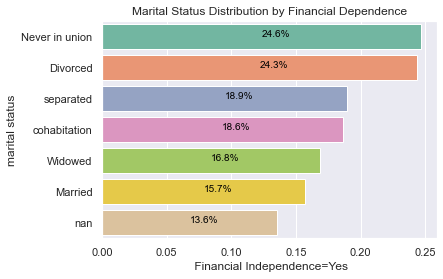

In [1018]:
genrerate_test(index='marital status', title="Marital Status Distribution by Financial Dependence")

Financial_Independance,children_group,0,1,All
0,0-5,0.762091,0.237909,6906
1,> 5,0.842919,0.157081,8607


stat=372.107, p=0.000
Probably dependent


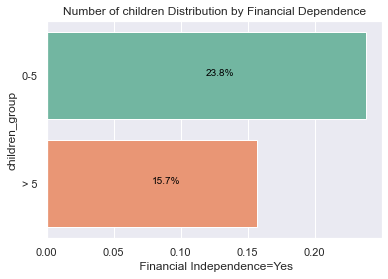

In [1000]:
genrerate_test(index="children_group",title="Number of children Distribution by Financial Dependence")

Financial_Independance,Age_group,0,1,All
3,30-34,0.770193,0.229807,1919
2,25-29,0.775204,0.224796,2202
4,35-39,0.796960,0.203040,1645
1,20-24,0.798053,0.201947,2773
5,40-44,0.813456,0.186544,1308
0,15-19,0.825824,0.174176,3307
6,45-49,0.843878,0.156122,1217
7,50+,0.864273,0.135727,1142


stat=372.107, p=0.000
Probably dependent


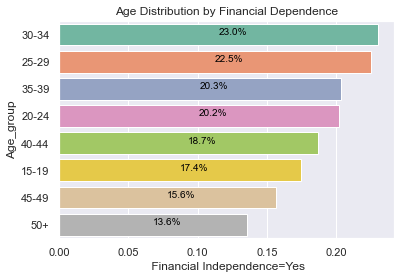

In [1001]:
genrerate_test(index="Age_group",title="Age Distribution by Financial Dependence")

Financial_Independance,Departement,0,1,All
7,Ouest,0.599133,0.400867,3692
4,Nord,0.778493,0.221507,1553
0,Artibonite,0.832806,0.167194,1896
6,Nord-Ouest,0.866752,0.133248,1561
5,Nord-Est,0.885399,0.114601,1178
1,Centre,0.890264,0.109736,1212
8,Sud,0.891660,0.108340,1283
9,Sud-Est,0.903593,0.096407,1141
3,Nippes,0.926729,0.073271,969
2,Grand'Anse,0.943580,0.056420,1028


stat=372.107, p=0.000
Probably dependent


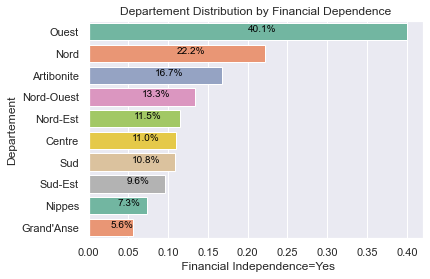

In [1002]:
genrerate_test(index="Departement",title="Departement Distribution by Financial Dependence")

Financial_Independance,Residence_place,0,1,All
1,Urban,0.591589,0.408411,6087
0,Rural,0.946000,0.054000,9426


stat=372.107, p=0.000
Probably dependent


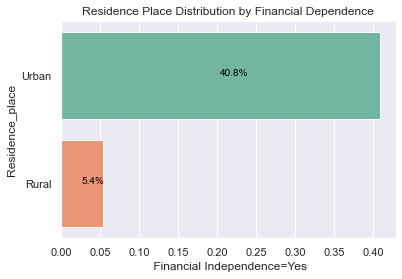

In [1003]:
genrerate_test(index="Residence_place",title="Residence Place Distribution by Financial Dependence")

Financial_Independance,Highest educational level,0,1,All
0,Higher,0.322506,0.677494,862
3,Secondary,0.726029,0.273971,6946
2,Primary,0.915989,0.084011,4916
1,No education,0.965938,0.034062,2789


stat=372.107, p=0.000
Probably dependent


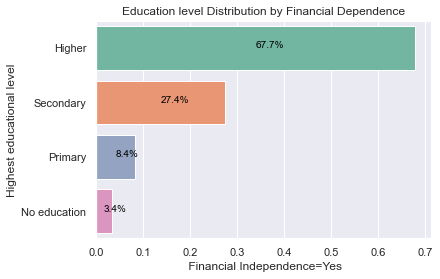

In [1004]:
genrerate_test(index="Highest educational level",title="Education level Distribution by Financial Dependence")

In [839]:
educ_work=pd.pivot_table(data=df, index=["Highest educational level"], values="Case Identification", columns="currently_working", aggfunc="count",margins=True, fill_value=0)
educ_work

currently_working,0,1,All
Highest educational level,,,
Higher,447,415,862
No education,1522,1267,2789
Primary,2758,2158,4916
Secondary,4586,2360,6946
All,9313,6200,15513


Financial_Independance,Religion,0,1,All
2,Other,0.000000,1.000000,1
3,Protestant,0.775084,0.224916,8332
0,Catholic,0.832584,0.167416,6009
1,No religion,0.895161,0.104839,992
4,Vaudousant,0.944134,0.055866,179


stat=372.107, p=0.000
Probably dependent


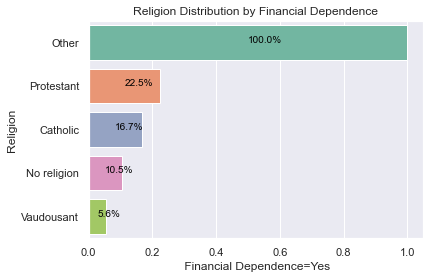

In [840]:
genrerate_test(index="Religion",title="Religion Distribution by Financial Dependence")

In [841]:
df1=df[df["Financial_Independance"]==1]
df1.Age.fillna(df1.Age.mean())

age1=df1.Age.mean()
age1
df2=df[df["Financial_Independance"]==0]
age2=df2.Age.mean()
age2

from scipy.stats import ttest_ind
ttest_ind(age1,age2)

C:\Users\bootcamp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\bootcamp\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [842]:
children1=df1.children_number.mean()
children2=df2.children_number.mean()

ttest_ind(children1,children2)

Ttest_indResult(statistic=nan, pvalue=nan)

In [843]:
a=df.Age.mean()
print(df[df["Financial_Independance"]=="1"].value_counts())
#.Age.mean())
# print(df[df["currently_working"]=="Yes"].Age.mean())
# print(df[df["Bank_Account"]=="Yes"].Age.mean())
a

Series([], dtype: int64)


30.576871011409786

In [844]:
df.columns

Index(['Case Identification', 'Respondent year of birth', 'Age', 'Age_group',
       'Departement', 'Residence_place', 'Highest educational level',
       'Religion', 'Education in single years', 'Bank_Account',
       'children_number', 'marital status', 'currently_working',
       'Respondent_occupation', 'Spend earnings', 'children_group',
       'Wealth index combined_Middle', 'Wealth index combined_Poorer',
       'Wealth index combined_Poorest', 'Wealth index combined_Richer',
       'Wealth index combined_Richest', 'Score', 'score1',
       'Financial_Independance'],
      dtype='object')

In [845]:
df.drop(["Score","score1","Respondent_occupation","Spend earnings","currently_working","Residence_place","Case Identification","Respondent year of birth","Age_group","Bank_Account","Education in single years","children_group","Wealth index combined_Middle","Wealth index combined_Poorer","Wealth index combined_Poorest","Wealth index combined_Richer","Wealth index combined_Richest"],axis=1,inplace=True)

In [846]:
df["Departement"]=df["Departement"].apply(lambda x: str(x).replace("Grand'Anse","Grand_anse"))

In [847]:
# labels=df.pop("Financial_Independance")

In [848]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(df,labels,test_size=0.25)

In [849]:
# from sklearn.ensemble import RandomForestClassifier
# rf= RandomForestClassifier()
# rf.fit(x_train,y_train)

In [850]:
# y_pred=rf.predict(x_test)

In [851]:
# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test,y_pred)
# roc_auc= auc(false_positive_rate, true_positive_rate)

In [852]:
# n_estimators=[1,2,4,8,16,32,64,100,200]
# train_results =[]
# test_results=[]
# for estimator in n_estimators:
#     rf= RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
#     rf.fit(x_train,y_train)
#     train_pred=rf.predict(x_train)
#     false_positive_rate,true_positive_rate,thresholds= roc_curve(y_train,train_pred)
#     roc_auc=auc(false_positive_rate,true_positive_rate)
#     train_results.append(roc_auc)
#     y_pred=rf.predict(x_test)
#     false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
#     roc_auc=auc(false_positive_rate,true_positive_rate)
#     test_results.append(roc_auc)

# from matplotlib.legend_handler import HandlerLine2D
# line1, =plt.plot(n_estimators,train_results,"b",label="Train AUC")
# line2,= plt.plot(n_estimators, test_results,'r',label="Test AUC")
# plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})
# plt.ylabel("AUC score")
# plt.xlabel("n_estimators")
# plt.show

In [853]:
df=pd.get_dummies(df, columns=['Departement','Highest educational level','Religion','marital status'])
df

,Age,children_number,Financial_Independance,Departement_Artibonite,Departement_Centre,Departement_Grand_anse,Departement_Nippes,Departement_Nord,Departement_Nord-Est,Departement_Nord-Ouest,...,Religion_Other,Religion_Protestant,Religion_Vaudousant,marital status_Divorced,marital status_Married,marital status_Never in union,marital status_Widowed,marital status_cohabitation,marital status_nan,marital status_separated
0,18,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,33,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,58,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
15509,26,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
15510,34,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
15511,34,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [854]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled =  pd.DataFrame(df_scaled , columns  =  df.columns)


In [855]:
df_scaled

,Age,children_number,Financial_Independance,Departement_Artibonite,Departement_Centre,Departement_Grand_anse,Departement_Nippes,Departement_Nord,Departement_Nord-Est,Departement_Nord-Ouest,...,Religion_Other,Religion_Protestant,Religion_Vaudousant,marital status_Divorced,marital status_Married,marital status_Never in union,marital status_Widowed,marital status_cohabitation,marital status_nan,marital status_separated
0,0.061224,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.265306,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.061224,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.367347,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.265306,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,0.877551,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15509,0.224490,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15510,0.387755,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15511,0.387755,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Random Forest Modelisation
In this  part, i did severals models and after i will choose the most efficient models

In [856]:
Y=df_scaled[["Financial_Independance"]]
Y

,Financial_Independance
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
15508,1.0
15509,1.0
15510,1.0
15511,1.0


In [857]:
X=df_scaled.drop(labels=["Financial_Independance"],axis=1)
X

,Age,children_number,Departement_Artibonite,Departement_Centre,Departement_Grand_anse,Departement_Nippes,Departement_Nord,Departement_Nord-Est,Departement_Nord-Ouest,Departement_Ouest,...,Religion_Other,Religion_Protestant,Religion_Vaudousant,marital status_Divorced,marital status_Married,marital status_Never in union,marital status_Widowed,marital status_cohabitation,marital status_nan,marital status_separated
0,0.061224,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.265306,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.061224,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.367347,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.265306,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,0.877551,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15509,0.224490,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15510,0.387755,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15511,0.387755,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [858]:
!pip install imblearn

In [859]:
from sklearn.model_selection import train_test_split

In [860]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.5)
X,y= oversample.fit_resample(X,Y)

In [861]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=20)
print(X_train)

            Age  children_number  Departement_Artibonite  Departement_Centre  \
8787   0.163265         0.066667                     0.0                 0.0   
2181   0.469388         0.200000                     0.0                 0.0   
13323  0.653061         0.066667                     0.0                 0.0   
1756   0.061224         0.000000                     0.0                 0.0   
3356   0.612245         0.133333                     0.0                 0.0   
...         ...              ...                     ...                 ...   
1607   0.816327         0.000000                     0.0                 0.0   
3915   0.673469         0.000000                     0.0                 0.0   
14729  0.265306         0.066667                     0.0                 1.0   
4367   0.142857         0.266667                     0.0                 1.0   
15715  0.265306         0.000000                     0.0                 0.0   

       Departement_Grand_anse  Departem

In [862]:
from sklearn.ensemble import RandomForestClassifier

In [863]:
model=RandomForestClassifier(n_estimators=10,random_state=30)

In [864]:
model.fit(X_train,y_train)

<ipython-input-864-b7a8c64777c1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=30)

In [865]:
y_pred=model.predict(X_test)
print(y_pred)

[1. 0. 0. ... 0. 0. 1.]


In [866]:
from sklearn import metrics

In [867]:
print("Accuracy=",metrics.accuracy_score(y_test, y_pred))
#plot_confusion_matrix(model,X_test,Y_test)

Accuracy= 0.7987220447284346


In [868]:
X_train

,Age,children_number,Departement_Artibonite,Departement_Centre,Departement_Grand_anse,Departement_Nippes,Departement_Nord,Departement_Nord-Est,Departement_Nord-Ouest,Departement_Ouest,...,Religion_Other,Religion_Protestant,Religion_Vaudousant,marital status_Divorced,marital status_Married,marital status_Never in union,marital status_Widowed,marital status_cohabitation,marital status_nan,marital status_separated
8787,0.163265,0.066667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2181,0.469388,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13323,0.653061,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1756,0.061224,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3356,0.612245,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.816327,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3915,0.673469,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14729,0.265306,0.066667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4367,0.142857,0.266667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [869]:
feature_list=list(X_train.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Age                                       0.356162
children_number                           0.138227
Departement_Ouest                         0.081341
Highest educational level_Higher          0.078075
Highest educational level_Secondary       0.050616
Highest educational level_No education    0.048188
Highest educational level_Primary         0.044492
Religion_Protestant                       0.016315
Departement_Nippes                        0.015379
Departement_Grand_anse                    0.015331
marital status_Married                    0.014410
Departement_Nord                          0.014373
Religion_Catholic                         0.014164
Departement_Sud                           0.012931
Departement_Artibonite                    0.011798
marital status_Never in union             0.011617
Departement_Nord-Est                      0.011175
Departement_Nord-Ouest                    0.011147
Departement_Sud-Est                       0.009505
Religion_No religion           

In [1032]:
# The baseline predictions are the historical averages
baseline_preds = X_test[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))
# Average baseline error:  5.06 degrees.

ValueError: 'average' is not in list

## Logistic Regression

In [870]:
lr  = LogisticRegression(max_iter=800)

In [871]:
print(lr.fit(X_train,y_train))

LogisticRegression(max_iter=800)


C:\Users\bootcamp\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [872]:
# log_reg = sm.Logit(Y_train, X_train).fit()

In [873]:
# print(log_reg.summary())

In [874]:
# Y_train.value_counts()

In [875]:
lr.score(X_test,y_test)

0.7694355697550586

In [876]:
y_pred = lr.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

<function confusion_matrix at 0x000001DAE2B2B3A0>


C:\Users\bootcamp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


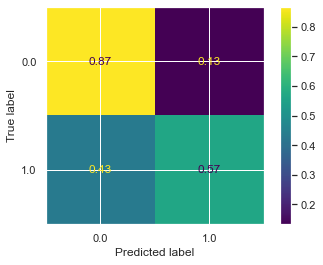

In [877]:
from sklearn.metrics import plot_confusion_matrix
#confusion_matrix=confusion_matrix(Y_test,y_pred)
print(confusion_matrix)
plot_confusion_matrix(lr,X_test,y_test,normalize="true") 
# plt.set_cmap("YlOrRd")

C:\Users\bootcamp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


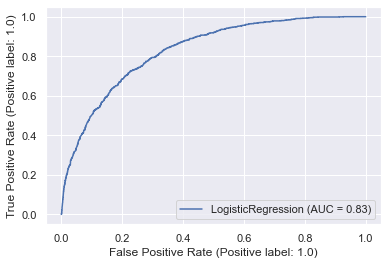

In [878]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,y_test)

C:\Users\bootcamp\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bootcamp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bootcamp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed i

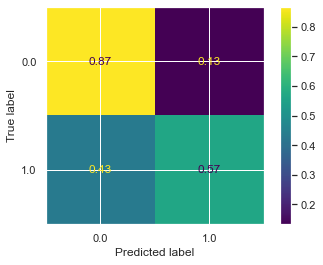

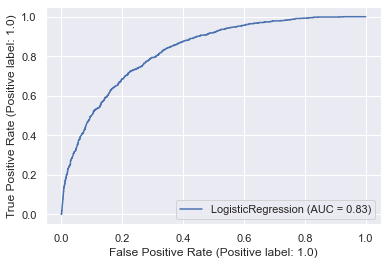

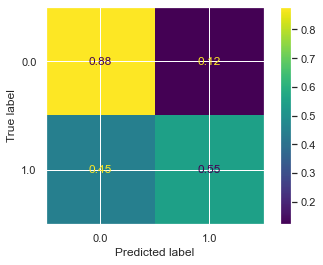

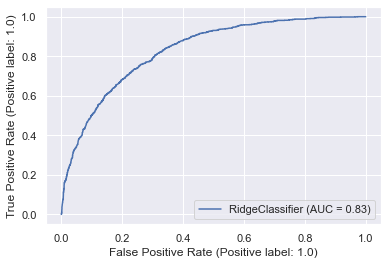

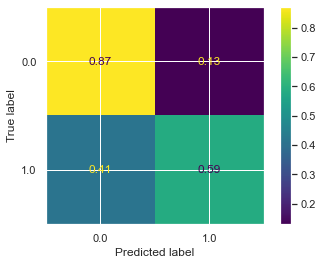

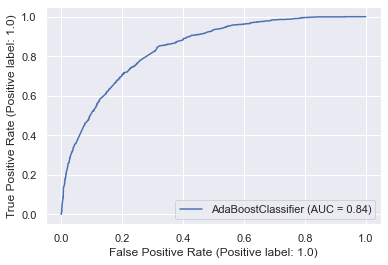

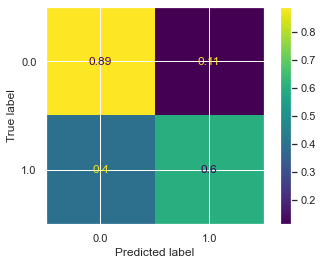

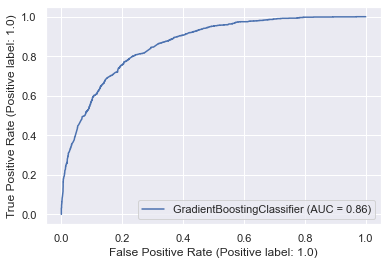

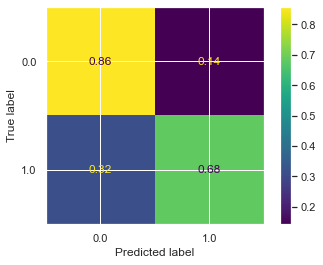

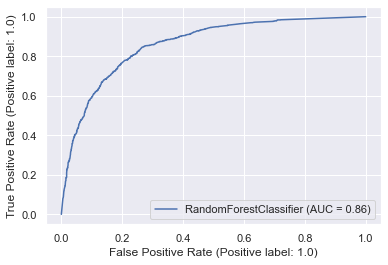

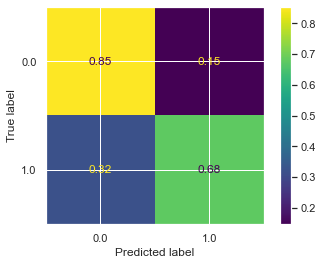

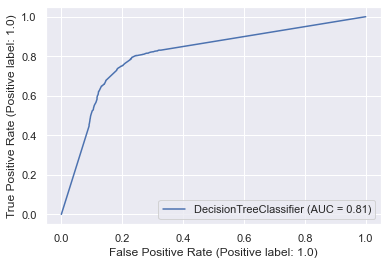

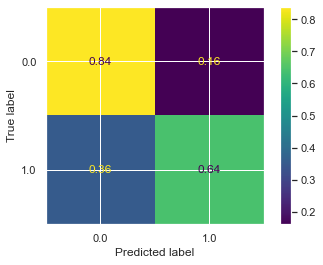

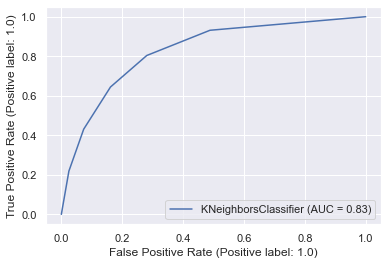

In [879]:
import time 
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test,normalize="true")
  plot_roc_curve(model,X_test,y_test)
  
df2=pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))


In [880]:
df2

,names,scores,times
0,LogisticRegression,0.769436,0.084774
1,RidgeClassifier,0.772630,0.010971
2,AdaBoostClassifier,0.777955,0.407938
3,GradientBoostingClassifier,0.795261,0.970403
4,RandomForestClassifier,0.800852,0.869673
5,DecisionTreeClassifier,0.796326,0.041897
6,KNeighborsClassifier,0.775293,0.002992


In [881]:
y_pred =models[0].predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      2533
         1.0       0.67      0.57      0.62      1223

    accuracy                           0.77      3756
   macro avg       0.74      0.72      0.73      3756
weighted avg       0.76      0.77      0.76      3756



In [882]:
y_pred =models[1].predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84      2533
         1.0       0.69      0.55      0.61      1223

    accuracy                           0.77      3756
   macro avg       0.75      0.72      0.73      3756
weighted avg       0.77      0.77      0.77      3756



In [883]:
y_pred =models[2].predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      2533
         1.0       0.69      0.59      0.63      1223

    accuracy                           0.78      3756
   macro avg       0.75      0.73      0.74      3756
weighted avg       0.77      0.78      0.77      3756



C:\Users\bootcamp\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [884]:
y_pred =models[3].predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2533
         1.0       0.72      0.60      0.66      1223

    accuracy                           0.80      3756
   macro avg       0.77      0.75      0.76      3756
weighted avg       0.79      0.80      0.79      3756



In [885]:
y_pred =models[4].predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      2533
         1.0       0.70      0.68      0.69      1223

    accuracy                           0.80      3756
   macro avg       0.77      0.77      0.77      3756
weighted avg       0.80      0.80      0.80      3756



In [886]:
models[3].feature_importances_

array([8.86607344e-02, 1.38987669e-01, 1.61019904e-02, 6.10981927e-04,
       8.47791338e-03, 7.07887164e-03, 2.63379733e-02, 1.35775973e-03,
       1.15518123e-03, 2.83093088e-01, 2.99591347e-03, 3.34745968e-03,
       1.40387186e-01, 6.55500887e-02, 3.82960835e-02, 1.51470761e-01,
       8.98478034e-04, 1.30677327e-02, 0.00000000e+00, 1.48882297e-03,
       2.65452414e-03, 0.00000000e+00, 2.96288224e-03, 3.30891008e-03,
       8.35812125e-04, 7.70408767e-04, 5.02715041e-06, 9.77459620e-05])

In [887]:
X

,Age,children_number,Departement_Artibonite,Departement_Centre,Departement_Grand_anse,Departement_Nippes,Departement_Nord,Departement_Nord-Est,Departement_Nord-Ouest,Departement_Ouest,...,Religion_Other,Religion_Protestant,Religion_Vaudousant,marital status_Divorced,marital status_Married,marital status_Never in union,marital status_Widowed,marital status_cohabitation,marital status_nan,marital status_separated
0,0.061224,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.265306,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.061224,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.367347,0.066667,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.265306,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18772,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18773,0.365405,0.148414,0.0,0.0,0.0,0.0,0.226213,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18774,0.160675,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18775,0.510204,0.199638,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?

## Reflections.

## I will focus on the question insights related to the variable I want to use which is the financial independence of women. Since the question was to see how many women are independent as a result of scores on different variables and to present the profile of independent women I will share information on the combination of the main variable with variables such as departments, number of children these women have, age groups, education levels, whether these women are predominantly urban or rural.

